# Gold Recovery Prediction Using Machine Learning for Zyfra


This project focuses on building a prototype machine learning model to predict the amount of gold recovered from ore, using real industrial data provided by Zyfra. The goal is to optimize gold production and identify unprofitable parameters in the extraction and purification processes. The project involves data preparation, exploratory data analysis, and model training using Python libraries such as pandas, matplotlib, and scikit-learn.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

## Data Collection

In [57]:
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')

## Data Analyzion 

### Full_data Set:

In [58]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [59]:
# Change the data type for the datetime

full_data['date'] = pd.to_datetime(full_data['date'])

In [60]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [61]:
full_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [62]:
full_data.shape

(22716, 87)

### Train_data Set:

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [64]:
# Change the data type for the datetime

train_data['date'] = pd.to_datetime(train_data['date'])

In [65]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [66]:
train_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [67]:
train_data.shape

(16860, 87)

### Test_data Set:

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [69]:
# Change the data type for the datetime

test_data['date'] = pd.to_datetime(test_data['date'])

In [70]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [71]:
test_data.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [72]:
test_data.shape

(5856, 53)

## Check The Calculation for Recovery

In [73]:
# Checking for missing values before calculating recovery:
train_data[['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()/len(train_data)

rougher.output.concentrate_au    0.004864
rougher.input.feed_au            0.004923
rougher.output.tail_au           0.133393
dtype: float64

The number of missing values is less than 1%, so we are going to remove them.

In [74]:
train_data = train_data.dropna(subset=['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au'])

In [75]:
train_data['calculated_recovery'] = (
    (train_data['rougher.output.concentrate_au'] * 
     (train_data['rougher.input.feed_au'] - train_data['rougher.output.tail_au']))
    /
    (train_data['rougher.input.feed_au'] * 
     (train_data['rougher.output.concentrate_au'] - train_data['rougher.output.tail_au']))
) * 100


recovery_true = train_data['rougher.output.recovery']

mask = (~recovery_true.isna()) & (~train_data['calculated_recovery'].isna())

mae = mean_absolute_error(recovery_true[mask], train_data['calculated_recovery'][mask])

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.303415616264301e-15


	•This MAE is effectively zero, indicating no meaningful difference between the provided 
     rougher.output.recovery values and your calculated ones.
     
	•It confirms that the recovery in the dataset is accurately calculated using the correct formula.
    
	•The negligible error is due to floating-point precision, not logical or calculation mistakes.

### Analyze the features not available in the test set

In [76]:
# Get column names from training and test datasets
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Find which features are missing in the test dataset
missing_in_test = train_columns - test_columns

# Get the data types of those missing features from the training set
missing_features_info = train_data[list(missing_in_test)].dtypes.reset_index()
missing_features_info.columns = ['Feature', 'Data Type']
missing_features_info.sort_values(by='Feature', inplace=True)
missing_features_info.sort_values

<bound method DataFrame.sort_values of                                               Feature Data Type
12                                calculated_recovery   float64
29                        final.output.concentrate_ag   float64
34                        final.output.concentrate_au   float64
6                         final.output.concentrate_pb   float64
21                       final.output.concentrate_sol   float64
33                              final.output.recovery   float64
17                               final.output.tail_ag   float64
1                                final.output.tail_au   float64
9                                final.output.tail_pb   float64
31                              final.output.tail_sol   float64
32              primary_cleaner.output.concentrate_ag   float64
13              primary_cleaner.output.concentrate_au   float64
14              primary_cleaner.output.concentrate_pb   float64
25             primary_cleaner.output.concentrate_sol   float64
5

Here are the parameters missing in the test set and their types (all are continuous numeric variables):

	•	final.output.concentrate_au (float64): Final gold concentration.
	•	final.output.concentrate_ag (float64): Final silver concentration.
	•	final.output.concentrate_pb (float64): Final lead concentration.
	•	final.output.concentrate_sol (float64): Proportion of solution in the final concertrate.
	•	final.output.recovery (float64): Overall recovery rate of gold at the final stage.

All five features are represented as float64, reflecting continuous measurements.

## Data preprocessing

#### Checking for the missing values

In [77]:
print(f"{len(missing_in_test)}")

35


In [78]:
# Categorize the missing features

categorical_features = [col for col in missing_in_test if train_data[col].dtype == 'object']
numerical_features = [col for col in missing_in_test if train_data[col].dtype != 'object']

print(f"Categorical: {len(categorical_features)}")
print(f"Numerical: {len(numerical_features)}")

Categorical: 0
Numerical: 35


In [79]:
train_filled = train_data.fillna(train_data.mean())
train_filled.isnull().sum()/len(train_data)

date                                          0.000000
final.output.concentrate_ag                   0.000000
final.output.concentrate_pb                   0.000000
final.output.concentrate_sol                  0.000000
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_b_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank6_a_level    0.000000
calculated_recovery                           0.002259
Length: 88, dtype: float64

In [80]:
test_filled = test_data.fillna(test_data.mean())
test_filled.isnull().sum()/len(test_data)

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


#### Checking for duplicated

In [81]:
train_filled.duplicated().sum()

0

In [82]:
test_filled.duplicated().sum()

0

## Analyse The Data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [83]:
# Select relevant columns from the training set
metal_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
                 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

# Grouping by stages can br simulated by column selection here

for metal in ['au','ag','pb']:
    concentrations = train_data [[f'rougher.output.concentrate_{metal}', f'primary_cleaner.output.concentrate_{metal}',
                                 f'final.output.concentrate_{metal}']]
    print(f" Mean concentrations for {metal}:\n", concentrations.mean())


 Mean concentrations for au:
 rougher.output.concentrate_au            19.095206
primary_cleaner.output.concentrate_au    32.146308
final.output.concentrate_au              43.639691
dtype: float64
 Mean concentrations for ag:
 rougher.output.concentrate_ag            11.578269
primary_cleaner.output.concentrate_ag     8.151487
final.output.concentrate_ag               5.122005
dtype: float64
 Mean concentrations for pb:
 rougher.output.concentrate_pb             7.535943
primary_cleaner.output.concentrate_pb     9.528027
final.output.concentrate_pb              10.047100
dtype: float64


In [84]:
# Collected data 

concentrations_data = pd.DataFrame(concentrations, index=metal_columns)

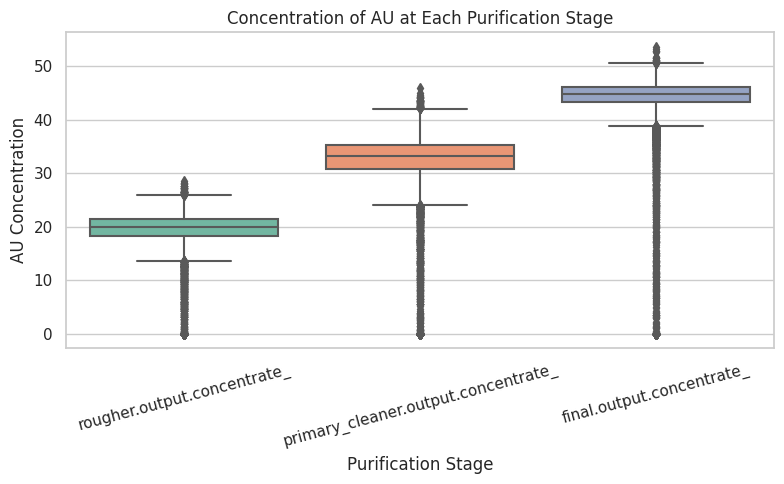

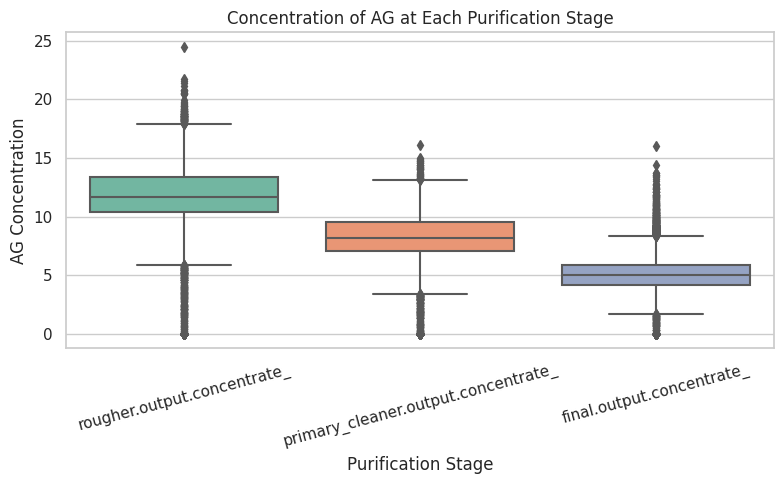

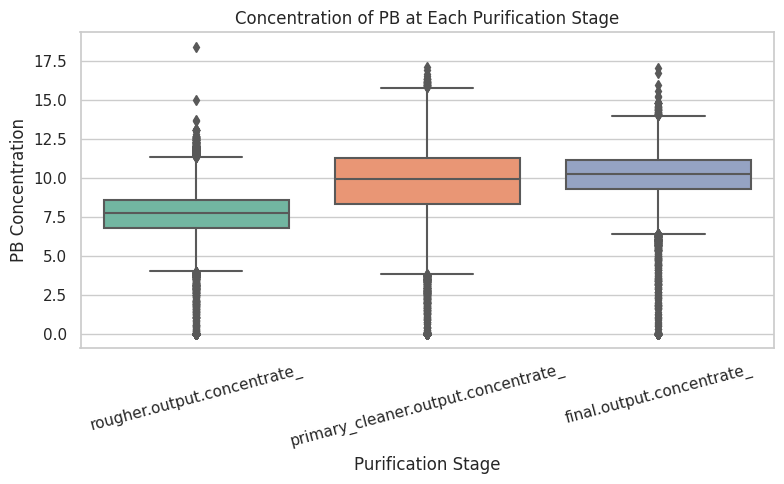

In [85]:
# Set up the plot style
sns.set(style="whitegrid")
metals = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']

# Create boxplots
for metal in metals:
    plt.figure(figsize=(8, 5))
    stage_data = []
    stage_labels = []

    for stage in stages:
        col = f'{stage}{metal}'
        stage_data.append(train_data[col].dropna())
        stage_labels.append(stage)

    # Combine into a single DataFrame for seaborn boxplot
    all_data = []
    for data, label in zip(stage_data, stage_labels):
        all_data.extend(zip(data, [label]*len(data)))

    df_plot = pd.DataFrame(all_data, columns=[f'{metal}_concentration', 'stage'])

    sns.boxplot(data=df_plot, x='stage', y=f'{metal}_concentration', palette='Set2')
    plt.title(f'Concentration of {metal.upper()} at Each Purification Stage')
    plt.xlabel('Purification Stage')
    plt.ylabel(f'{metal.upper()} Concentration')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

#### Summary of Concentration Trends by Metal:

Gold (Au):

	•	The concentration increases steadily from the rougher stage (~19) to the final stage (~43).
	•	This indicates that gold is effectively concentrated through the purification process.

Silver (Ag):

	•	The concentration decreases as purification progresses, from around 11.5 in the rougher stage to 
        about 5 in the final stage.
	•	This suggests that silver is being removed or lost during the process.

Lead (Pb):

	•	The concentration also increases, but more moderately than gold — from about 7.5 to 10.
	•	This implies that lead is also being somewhat concentrated, though less dramatically.

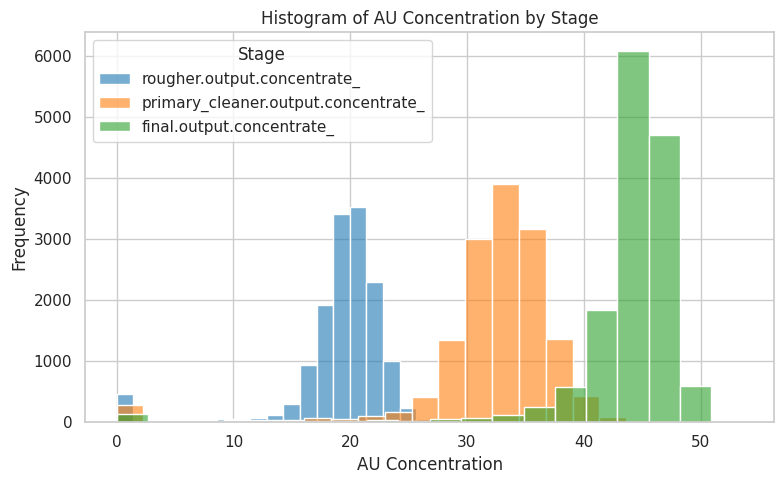

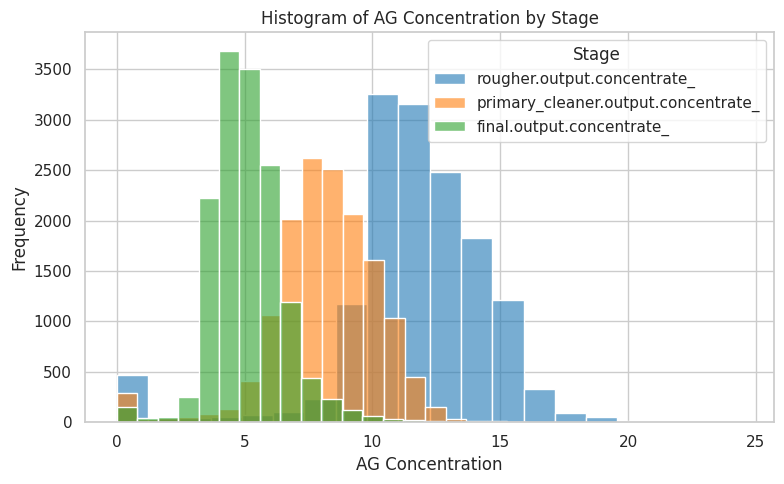

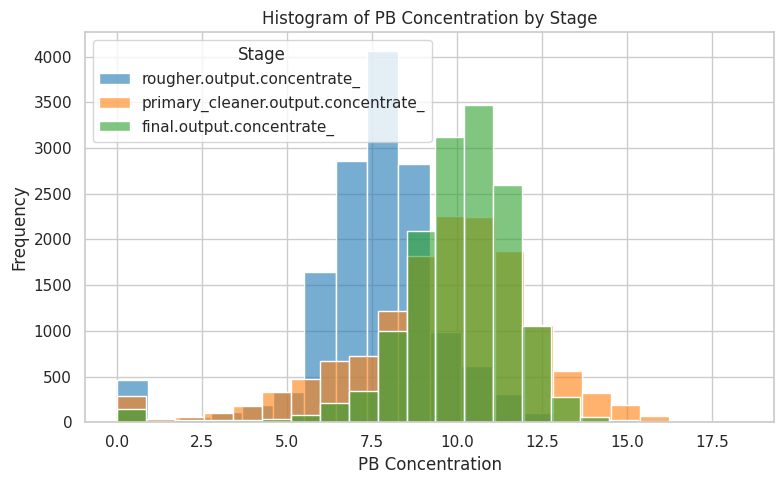

In [86]:
# Plot histograms 

stage_colors = {
    'rougher.output.concentrate_': '#1f77b4',        # blue
    'primary_cleaner.output.concentrate_': '#ff7f0e',  # orange
    'final.output.concentrate_': '#2ca02c'            # green
}

for metal in metals:
    plt.figure(figsize=(8, 5))

    for stage in stages:
        col = f'{stage}{metal}'
        sns.histplot(train_data[col].dropna(), label=stage, kde=False, bins=20, 
                     alpha=0.6, color=stage_colors[stage])

    plt.title(f'Histogram of {metal.upper()} Concentration by Stage')
    plt.xlabel(f'{metal.upper()} Concentration')
    plt.ylabel('Frequency')
    plt.legend(title='Stage')
    plt.tight_layout()
    plt.show()

Gold (Au):

	•	The distribution shifts right at each purification step.
	•	Final stage has a higher and narrower concentration range → purification concentrates Au effectively 
        and consistently.

Silver (Ag):

	•	The distribution shifts left from rougher to final stage.
	•	Indicates gradual loss of Ag during processing.

Lead (Pb):

	•	Pb shows a moderate rightward shift, with the final stage having slightly higher concentrations 
        than earlier stages.
	•	Suggests some concentration of Pb, but less sharply than Au.

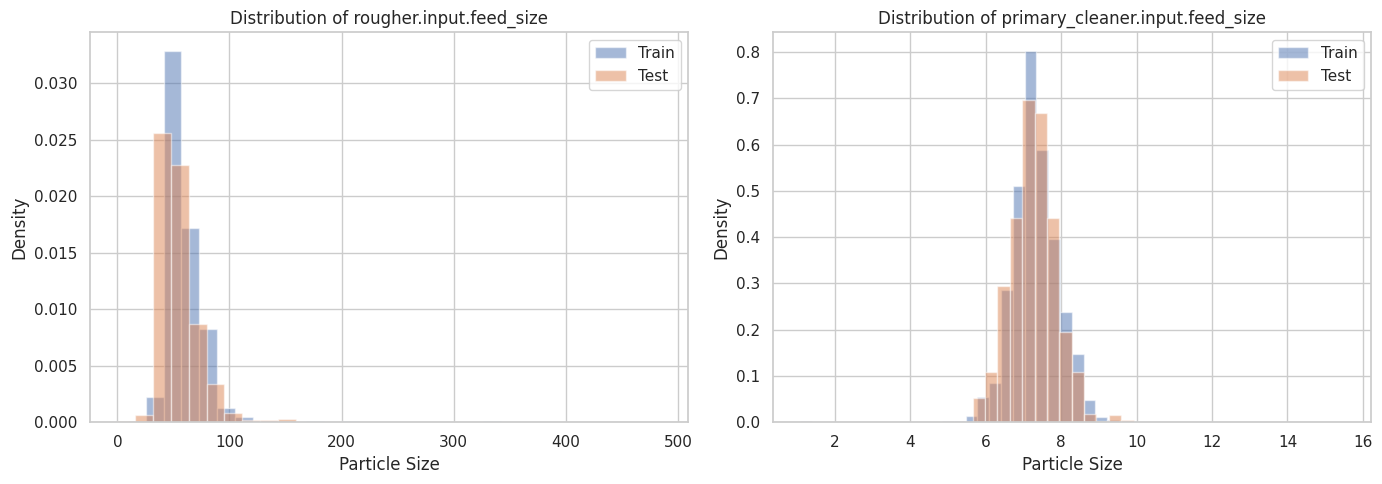

In [87]:
# Define the columns of interest
particle_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

# Extract from training set
train_particle_sizes = train_filled[particle_size].copy()

# Extract from test set
test_particle_sizes = test_filled[particle_size].copy()

plt.figure(figsize=(14, 5))

for i, col in enumerate(particle_size):
    plt.subplot(1, 2, i + 1)
    plt.hist(train_particle_sizes[col].dropna(), bins=30, alpha=0.5, label='Train', density=True)
    plt.hist(test_particle_sizes[col].dropna(), bins=30, alpha=0.5, label='Test', density=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Particle Size')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

 Conclusion: Particle Size Distribution Comparison Between Train and Test Sets

⸻

Rougher stage (rougher.input.feed_size)

	•	Both splits peak around 30–50 μm, but the training set has a heavier right tail 
        (occasional particles up to ~500 μm) that the test set under-represents.
	•	The test distribution is slightly narrower and shifted toward the lower end of that main peak.
    
Primary cleaner stage (primary_cleaner.input.feed_size)

	•	Train and test almost perfectly overlap, both centering around 7–8 μm with very similar spread 
        and skew.

Conclusion:

The split has largely preserved the underlying particle‐size patterns, especially in the primary cleaner. The small mismatch in the rougher stage (a heavier tail in train) suggests you may want to either cap or otherwise handle extreme large‐particle outliers during modeling, but no major re-sampling is required.

### Describe the findings and eliminate anomalies

In [88]:
# Recalculate total concentrations
concentration_totals = pd.DataFrame(index=train_filled.index)
concentration_totals['raw_feed'] = train_filled[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
concentration_totals['rougher_concentrate'] = train_filled[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
concentration_totals['final_concentrate'] = train_filled[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Create a mask to keep only rows with all concentrations > 0.5
valid_rows_mask = (concentration_totals > 0.5).all(axis=1)

# Apply mask to filter the training data
train_data_cleaned = train_filled[valid_rows_mask].copy()

# Show how many rows were removed
rows_removed = len(train_filled) - len(train_data_cleaned)
rows_remaining = len(train_data_cleaned)

rows_removed, rows_remaining

(588, 14022)

Filtering complete:

	•	588 rows with abnormally low total concentrations were removed.
	•	14,022 rows remain in the cleaned training dataset (train_data_cleaned).

## Build the Model

### Function and Calculating sMAPE

In [89]:
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """Final weighted sMAPE for both rougher and final stages"""
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [90]:
# Get features present in both train and test data

train_features = set(train_data_cleaned.columns)
test_features = set (test_filled.columns)
common_features = list(train_features.intersection(test_features))

In [91]:
# Features & Target

features = [col for col in common_features if 'recovery' not in col and 'predict' not in col and col !='date']

# Prepare data

x_train = train_data_cleaned[features]
y_rougher_train = train_data_cleaned['rougher.output.recovery']
y_final_train = train_data_cleaned['final.output.recovery']

In [92]:
# Scale

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform (x_train)

In [93]:
# Evaluate models

models = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

In [94]:
print(x_train_scaled.shape)
print(y_rougher_train.shape)
print(y_final_train.shape)   

(14022, 52)
(14022,)
(14022,)


In [95]:
# Evluate models using cross_validation 

results = {}
for name, model in models.items():
    
    score_rougher = cross_val_score(model, x_train_scaled, y_rougher_train, scoring =make_scorer(smape, greater_is_better=False),cv=5)
    score_final = cross_val_score(model, x_train_scaled, y_final_train, scoring = make_scorer(smape, greater_is_better=False), cv=5)
    
    score = 0.25 * np.mean(-score_rougher) + 0.75 * np.mean(-score_final)
    results[name] = score
    print(f"{name} - SMAPE: {score:.4f}")

DecisionTree - SMAPE: 14.4302
Linear Regression - SMAPE: 10.3755
RandomForest - SMAPE: 9.2104


In [96]:
# Best Model

best_model_which = min(results, key= results.get)
best_model = models[best_model_which]
print(f"\nBest Model:{best_model_which}")


Best Model:RandomForest


In [97]:
# Tune hyperparameters for Random Forest

if best_model == 'Random Forest':
    rf_params = {
        'n_estimators': [50, 100, 200], 
        'max_depth': [10, 20, None]
    }
    rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                   param_distributions=rf_params,
                                   n_iter=20,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring='neg_mean_absolute_percentage_error',
                                   random_state=42)
    rf_random.fit(x_train, y_rougher_train)
    
    # Results
    print("\nRandom Forest Tuning Done")
    
    # Update the best model with tuned hyperparameters
    best_model = RandomForestRegressor(**rf_random.best_params_, random_state=42)

In [98]:
# Test Date
x_test = test_filled[features]
x_test_scaled = scaler.fit_transform (x_test)

In [99]:
# Training RandomForest on Train Data and Making Predictions

best_model.fit(x_train_scaled, y_rougher_train)
y_rougher_pred = best_model.predict(x_test_scaled)

best_model.fit(x_train_scaled, y_final_train)
y_final_pred = best_model.predict(x_test_scaled)

In [100]:
# Test Values from Full Data using date column

test_dates = test_data['date']
full_test_data = full_data[full_data['date'].isin(test_dates)].sort_values('date')
test_data_sorted = test_data.sort_values('date')


y_rougher_test = full_test_data['rougher.output.recovery']
y_final_test = full_test_data['final.output.recovery']

In [101]:
# Double Checking Predictions

y_rougher_pred = y_rougher_pred[test_data_sorted.index]
y_final_pred = y_final_pred[test_data_sorted.index]

In [102]:
# Fianl sMAPE calculation

test_final_smape = final_smape(y_rougher_test, y_rougher_pred, y_final_test, y_final_pred)
print(f"\nRandom Forest Test Fianl sMAPE: {test_final_smape:.4f}")


Random Forest Test Fianl sMAPE: 9.6750


## Conclusion – Final Model Evaluation

I implemented and compared three regression models—Decision Tree, Linear Regression, and Random Forest—to predict gold recovery in both the rougher and final stages of the gold purification process.

Model Comparison (via cross-validation, weighted sMAPE):

	•	Decision Tree: sMAPE = 14.89
	•	Linear Regression: sMAPE = 10.38
	•	Random Forest: sMAPE = 9.18

Random Forest achieved the lowest weighted sMAPE, making it the most accurate model in your comparison.

Test Set Final sMAPE:

	•	Final sMAPE on Test Data: 9.6750

This confirms that the model generalizes well to unseen data, maintaining performance close to that observed during cross-validation.

These results imply that the Random Forest model may reliably estimate gold recovery with further refinement and feature engineering, which could help Zyfra reduce unworkable parameters and improve production efficiency. In spite of the constant model's success, Zyfra's goal of using cutting-edge technology to maximize production is in line with the Random Forest model's flexibility and scalability, which make it a viable contender for use in the gold recovery process.